In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

es = EarlyStopping(monitor = 'val_loss', mode='min', verbose =1, patience =4)
mc = ModelCheckpoint('best_mode.h5', monitor='val_acc', mode='max',verbose=1)

In [0]:
from nltk.corpus import stopwords  

word2index = imdb.get_word_index()
index2word = {}
for key, value in word2index.items():
  index2word[value] = key

word = stopwords.words('english')

stopword_index = []
for w in word:
  if w in word2index:
    stopword_index.append(word2index[w])
  


In [0]:
def delete_stopwords(data, stopword):
  print('processing')
  for i in range(25000):
    for j in range(len(data[i])-1,-1,-1):
      if data[i][j] in stopword:
        print(j)
        data[i].pop(j)
        
  
  return data


In [0]:
train_without_stopwords = delete_stopwords(train_data, stopword_index)
test_without_stopwords = delete_stopwords(test_data, stopword_index)

In [0]:
original = ' '.join([index2word[x] for x in train_data[0]])
original

In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[1, sequence] = 1.
    return results

In [0]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test= np.asarray(test_labels).astype('float32')

## try 1 : Using LSTM


In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [0]:
model = Sequential()
model.add(Embedding(10000, 60))
model.add(LSTM(60))
model.add(Dense(1, activation = 'sigmoid'))

In [0]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics =['acc'])
history = model.fit(partial_x_train, partial_y_train, validation_data = (x_val, y_val), epochs = 10, batch_size =64, callbacks = [es,mc])

## Use Convolution Layers

In [0]:
from tensorflow.keras.layers import  Activation
from tensorflow.keras.utils import get_custom_objects
import tensorflow.keras.backend as K
import tensorflow as tf
class Mish(Activation):
    def __init__(self, activation, **kwargs):
        super(Mish, self).__init__(activation, **kwargs)
        self.__name__ = 'Mish'


def mish(x):
    return x * K.tanh(K.softplus(x))

get_custom_objects().update({'mish': Mish(mish)})

In [0]:
"""
Convolution
"""

from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Flatten, Dropout
from keras.layers import Conv1D, GlobalMaxPooling1D

max_features = 10000
text_max_words = 200



Using TensorFlow backend.


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt


In [0]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = max_features)

import numpy as np
def vectorize_sequence(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] =1.
  return results


x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_text = np.asarray(test_labels).astype('float32')

model = Sequential()
model.add(Dense(16, activation = 'relu',input_shape = (10000,)))
model.add(Dense(16, activation ='relu'))
model.add(Dense(1, activation ='sigmoid'))

model.compile(optimizer ='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size = 512, validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.5294 - accuracy: 0.7751 - val_loss: 0.4226 - val_accuracy: 0.8449
Epoch 2/20
15000/15000 [==============================] - 1s 90us/step - loss: 0.3139 - accuracy: 0.9017 - val_loss: 0.3138 - val_accuracy: 0.8818
Epoch 3/20
15000/15000 [==============================] - 1s 90us/step - loss: 0.2268 - accuracy: 0.9279 - val_loss: 0.2851 - val_accuracy: 0.8894
Epoch 4/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.1772 - accuracy: 0.9447 - val_loss: 0.2955 - val_accuracy: 0.8802
Epoch 5/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.1450 - accuracy: 0.9556 - val_loss: 0.2862 - val_accuracy: 0.8855
Epoch 6/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.1167 - accuracy: 0.9660 - val_loss: 0.2927 - val_accuracy: 0.8852
Epoch 7/20
15000/15000 [==============================] - 1s 91us/st

In [0]:
results = model.evaluate(x_test, y_test)
print(results)

25000/25000 [==============================] - 2s 76us/step
[0.7651928672266006, 0.8475599884986877]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 7500 samples, validate on 17500 samples
Epoch 1/20
7500/7500 [==============================] - 2s 201us/step - loss: 0.6931 - accuracy: 0.5116 - val_loss: 0.6923 - val_accuracy: 0.5029
Epoch 2/20
7500/7500 [==============================] - 1s 101us/step - loss: 0.6909 - accuracy: 0.5297 - val_loss: 0.6873 - val_accuracy: 0.5009
Epoch 3/20
7500/7500 [==============================] - 1s 101us/step - loss: 0.6736 - accuracy: 0.6016 - val_loss: 0.6355 - val_accuracy: 0.7762
Epoch 4/20
7500/7500 [==============================] - 1s 101us/step - loss: 0.5586 - accuracy: 0.7551 - val_loss: 0.4574 - val_accuracy: 0.7967
Epoch 5/20
7500/7500 [==============================] - 1s 101us/step - loss: 0.3762 - accuracy: 0.8421 - val_loss: 0.3626 - val_accuracy: 0.8414
Epoch 6/20
7500/7500 [==============================] - 1s 102us/step - loss: 0.2262 - accuracy: 0.9159 - val_loss: 0.3489 - val_accuracy: 0.8513
Epoch 7/20
7500/7500 [==============================] - 1s 101us/step - los

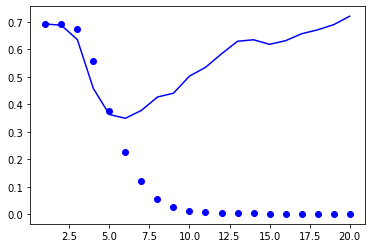

25000/25000 [==============================] - 1s 55us/step
## evaluation loss and_metrics ##
[0.7129896214261651, 0.8575999736785889]
25000/25000 [==============================] - 2s 61us/step
[0.7129896214261651, 0.8575999736785889]


In [0]:

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_val = x_train[7500:]
y_val = y_train[7500:]
x_train = x_train[:7500]
y_train = y_train[:7500]

# padding
x_train = sequence.pad_sequences(x_train, maxlen=text_max_words)
x_val = sequence.pad_sequences(x_val, maxlen=text_max_words)
x_test = sequence.pad_sequences(x_test, maxlen=text_max_words)

# asemble the layers
model = Sequential()
model.add(Embedding(max_features, 128, input_length=text_max_words))
model.add(Dropout(0.2))
model.add(Conv1D(256,3,padding='valid',activation='relu',strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. training model
history = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

# Plotting the history
%matplotlib inline
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validatin loss')

plt.show()

# evaluation
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

results = model.evaluate(x_test, y_test)
print(results)

In [0]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_val = x_train[20000:]
y_val = y_train[20000:]
x_train = x_train[:20000]
y_train = y_train[:20000]

# padding
x_train = sequence.pad_sequences(x_train, maxlen=text_max_words)
x_val = sequence.pad_sequences(x_val, maxlen=text_max_words)
x_test = sequence.pad_sequences(x_test, maxlen=text_max_words)

# asemble the layers
model = Sequential()
model.add(Embedding(max_features, 128, input_length=text_max_words))
model.add(Dropout(0.2))
model.add(Conv1D(256,3,padding='valid',activation='relu',strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. training model
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_val, y_val))

# evaluation
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

results = model.evaluate(x_test, y_test)
print(results)

17465344/17464789 [==============================] - 3s 0us/step


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 11s 554us/step - loss: 0.4547 - accuracy: 0.7648 - val_loss: 0.2926 - val_accuracy: 0.8814
Epoch 2/5
20000/20000 [==============================] - 4s 193us/step - loss: 0.2386 - accuracy: 0.9085 - val_loss: 0.2752 - val_accuracy: 0.8872
Epoch 3/5
20000/20000 [==============================] - 4s 195us/step - loss: 0.1247 - accuracy: 0.9562 - val_loss: 0.3218 - val_accuracy: 0.8870
Epoch 4/5
20000/20000 [==============================] - 4s 203us/step - loss: 0.0611 - accuracy: 0.9797 - val_loss: 0.3884 - val_accuracy: 0.8780
Epoch 5/5
25000/25000 [==============================] - 1s 53us/step
## evaluation loss and_metrics ##
[0.4927727150714397, 0.8703200221061707]
25000/25000 [==============================] - 1s 56us/step
[0.4927727150714397, 0.8703200221061707]


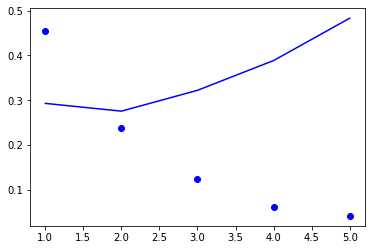

25000/25000 [==============================] - 2s 62us/step
## evaluation loss and_metrics ##
[0.4927727150714397, 0.8703200221061707]
25000/25000 [==============================] - 2s 63us/step
[0.4927727150714397, 0.8703200221061707]


In [0]:

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validatin loss')

plt.show()

# evaluation
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

results = model.evaluate(x_test, y_test)
print(results)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 4s 209us/step - loss: 0.5051 - accuracy: 0.7207 - val_loss: 0.3002 - val_accuracy: 0.8692
Epoch 2/5
20000/20000 [==============================] - 4s 187us/step - loss: 0.2502 - accuracy: 0.9055 - val_loss: 0.2843 - val_accuracy: 0.8846
Epoch 3/5
20000/20000 [==============================] - 4s 190us/step - loss: 0.1277 - accuracy: 0.9556 - val_loss: 0.3454 - val_accuracy: 0.8822
Epoch 4/5
20000/20000 [==============================] - 4s 193us/step - loss: 0.0663 - accuracy: 0.9784 - val_loss: 0.4025 - val_accuracy: 0.8812
Epoch 5/5
25000/25000 [==============================] - 1s 47us/step
## evaluation loss and_metrics ##
[0.5124614820683002, 0.8762800097465515]
25000/25000 [==============================] - 1s 53us/step
[0.5124614820683002, 0.8762800097465515]


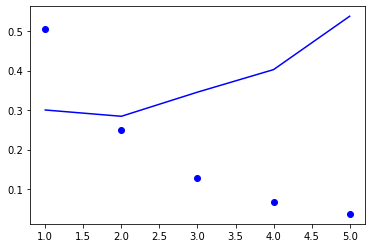

25000/25000 [==============================] - 1s 53us/step
## evaluation loss and_metrics ##
[0.5124614820683002, 0.8762800097465515]
25000/25000 [==============================] - 1s 57us/step
[0.5124614820683002, 0.8762800097465515]


In [0]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_val = x_train[20000:]
y_val = y_train[20000:]
x_train = x_train[:20000]
y_train = y_train[:20000]

# padding
x_train = sequence.pad_sequences(x_train, maxlen=text_max_words)
x_val = sequence.pad_sequences(x_val, maxlen=text_max_words)
x_test = sequence.pad_sequences(x_test, maxlen=text_max_words)

# asemble the layers
model = Sequential()
model.add(Embedding(max_features, 128, input_length=text_max_words))
model.add(Dropout(0.2))
model.add(Conv1D(128,3,padding='valid',activation='relu',strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. training model
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_val, y_val))

# evaluation
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

results = model.evaluate(x_test, y_test)
print(results)


history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validatin loss')

plt.show()

# evaluation
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

results = model.evaluate(x_test, y_test)
print(results)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 5s 231us/step - loss: 0.6020 - accuracy: 0.6332 - val_loss: 0.3798 - val_accuracy: 0.8402
Epoch 2/5
20000/20000 [==============================] - 4s 223us/step - loss: 0.3316 - accuracy: 0.8644 - val_loss: 0.2923 - val_accuracy: 0.8772
Epoch 3/5
20000/20000 [==============================] - 5s 226us/step - loss: 0.2218 - accuracy: 0.9171 - val_loss: 0.2809 - val_accuracy: 0.8880
Epoch 4/5
20000/20000 [==============================] - 4s 211us/step - loss: 0.1472 - accuracy: 0.9475 - val_loss: 0.3217 - val_accuracy: 0.8860
Epoch 5/5
25000/25000 [==============================] - 1s 55us/step
## evaluation loss and_metrics ##
[0.3228552157449722, 0.8745200037956238]
25000/25000 [==============================] - 1s 55us/step
[0.3228552157449722, 0.8745200037956238]


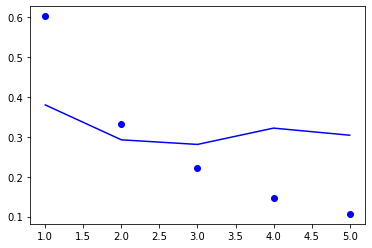

25000/25000 [==============================] - 2s 61us/step
## evaluation loss and_metrics ##
[0.3228552157449722, 0.8745200037956238]
25000/25000 [==============================] - 2s 60us/step
[0.3228552157449722, 0.8745200037956238]


In [0]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_val = x_train[20000:]
y_val = y_train[20000:]
x_train = x_train[:20000]
y_train = y_train[:20000]

# padding
x_train = sequence.pad_sequences(x_train, maxlen=text_max_words)
x_val = sequence.pad_sequences(x_val, maxlen=text_max_words)
x_test = sequence.pad_sequences(x_test, maxlen=text_max_words)

# asemble the layers
model = Sequential()
model.add(Embedding(max_features, 128, input_length=text_max_words))
model.add(Dropout(0.4))
model.add(Conv1D(256,3,padding='valid',activation='relu',strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. training model
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_val, y_val))

# evaluation
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

results = model.evaluate(x_test, y_test)
print(results)


history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validatin loss')

plt.show()

# evaluation
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

results = model.evaluate(x_test, y_test)
print(results)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 5s 234us/step - loss: 0.6825 - accuracy: 0.5279 - val_loss: 0.5447 - val_accuracy: 0.7338
Epoch 2/5
20000/20000 [==============================] - 4s 219us/step - loss: 0.3967 - accuracy: 0.8345 - val_loss: 0.3382 - val_accuracy: 0.8592
Epoch 3/5
20000/20000 [==============================] - 4s 218us/step - loss: 0.2605 - accuracy: 0.8981 - val_loss: 0.3118 - val_accuracy: 0.8746
Epoch 4/5
20000/20000 [==============================] - 4s 218us/step - loss: 0.1773 - accuracy: 0.9384 - val_loss: 0.3279 - val_accuracy: 0.8806
Epoch 5/5
25000/25000 [==============================] - 1s 57us/step
## evaluation loss and_metrics ##
[0.31386012877941133, 0.8751999735832214]
25000/25000 [==============================] - 1s 56us/step
[0.31386012877941133, 0.8751999735832214]


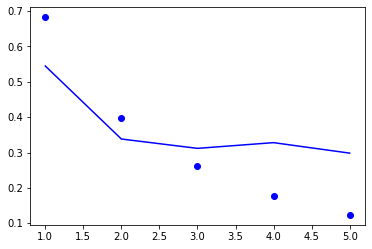

25000/25000 [==============================] - 1s 59us/step
## evaluation loss and_metrics ##
[0.31386012877941133, 0.8751999735832214]
25000/25000 [==============================] - 2s 61us/step
[0.31386012877941133, 0.8751999735832214]


In [0]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_val = x_train[20000:]
y_val = y_train[20000:]
x_train = x_train[:20000]
y_train = y_train[:20000]

# padding
x_train = sequence.pad_sequences(x_train, maxlen=text_max_words)
x_val = sequence.pad_sequences(x_val, maxlen=text_max_words)
x_test = sequence.pad_sequences(x_test, maxlen=text_max_words)

# asemble the layers
model = Sequential()
model.add(Embedding(max_features, 128, input_length=text_max_words))
model.add(Dropout(0.4))
model.add(Conv1D(256,3,padding='valid',activation='relu',strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. training model
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_val, y_val))

# evaluation
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

results = model.evaluate(x_test, y_test)
print(results)


history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validatin loss')

plt.show()

# evaluation
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

results = model.evaluate(x_test, y_test)
print(results)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 5s 227us/step - loss: 0.6942 - accuracy: 0.5002 - val_loss: 0.6931 - val_accuracy: 0.4938
Epoch 2/20
20000/20000 [==============================] - 4s 199us/step - loss: 0.6485 - accuracy: 0.5958 - val_loss: 0.5644 - val_accuracy: 0.7276
Epoch 3/20
20000/20000 [==============================] - 4s 216us/step - loss: 0.4632 - accuracy: 0.7941 - val_loss: 0.5101 - val_accuracy: 0.7726
Epoch 4/20
20000/20000 [==============================] - 4s 203us/step - loss: 0.3924 - accuracy: 0.8316 - val_loss: 0.4568 - val_accuracy: 0.7998
Epoch 5/20
20000/20000 [==============================] - 4s 200us/step - loss: 0.3589 - accuracy: 0.8519 - val_loss: 0.3988 - val_accuracy: 0.8270
Epoch 6/20
20000/20000 [==============================] - 4s 196us/step - loss: 0.3379 - accuracy: 0.8643 - val_loss: 0.3543 - val_accuracy: 0.8552
Epoch 7/20
20000/20000 [==============================] - 4s 21

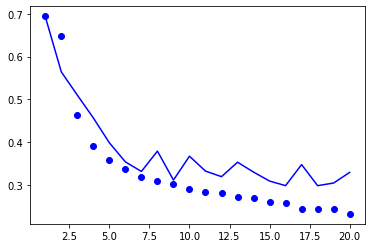

25000/25000 [==============================] - 2s 63us/step
## evaluation loss and_metrics ##
[0.3281707091140747, 0.8575599789619446]
25000/25000 [==============================] - 2s 62us/step
[0.3281707091140747, 0.8575599789619446]


In [0]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_val = x_train[20000:]
y_val = y_train[20000:]
x_train = x_train[:20000]
y_train = y_train[:20000]

# padding
x_train = sequence.pad_sequences(x_train, maxlen=text_max_words)
x_val = sequence.pad_sequences(x_val, maxlen=text_max_words)
x_test = sequence.pad_sequences(x_test, maxlen=text_max_words)

# asemble the layers
model = Sequential()
model.add(Embedding(max_features, 128, input_length=text_max_words))
model.add(Dropout(0.6))
model.add(Conv1D(256,3,padding='valid',activation='relu',strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0,4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0,4))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# 4. training model
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val))

# evaluation
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

results = model.evaluate(x_test, y_test)
print(results)


history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validatin loss')

plt.show()

# evaluation
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

results = model.evaluate(x_test, y_test)
print(results)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 4s 191us/step - loss: 0.6934 - accuracy: 0.5071 - val_loss: 0.6858 - val_accuracy: 0.5670
Epoch 2/20
20000/20000 [==============================] - 4s 186us/step - loss: 0.5409 - accuracy: 0.7264 - val_loss: 0.4048 - val_accuracy: 0.8198
Epoch 3/20
20000/20000 [==============================] - 3s 175us/step - loss: 0.4053 - accuracy: 0.8281 - val_loss: 0.3330 - val_accuracy: 0.8580
Epoch 4/20
20000/20000 [==============================] - 4s 178us/step - loss: 0.3537 - accuracy: 0.8544 - val_loss: 0.3182 - val_accuracy: 0.8674
Epoch 5/20
20000/20000 [==============================] - 3s 172us/step - loss: 0.3322 - accuracy: 0.8648 - val_loss: 0.3023 - val_accuracy: 0.8690
Epoch 6/20
20000/20000 [==============================] - 3s 175us/step - loss: 0.3111 - accuracy: 0.8779 - val_loss: 0.3264 - val_accuracy: 0.8764
Epoch 7/20
20000/20000 [==============================] - 4s 18

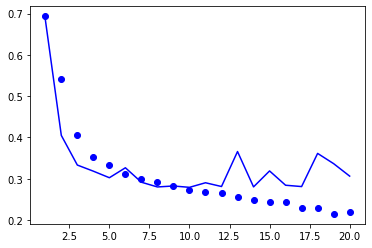

25000/25000 [==============================] - 1s 57us/step
## evaluation loss and_metrics ##
[0.2980324612188339, 0.8830400109291077]
25000/25000 [==============================] - 1s 57us/step
[0.2980324612188339, 0.8830400109291077]


In [0]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_val = x_train[20000:]
y_val = y_train[20000:]
x_train = x_train[:20000]
y_train = y_train[:20000]

# padding
x_train = sequence.pad_sequences(x_train, maxlen=text_max_words)
x_val = sequence.pad_sequences(x_val, maxlen=text_max_words)
x_test = sequence.pad_sequences(x_test, maxlen=text_max_words)

# asemble the layers
model = Sequential()
model.add(Embedding(max_features, 128, input_length=text_max_words))
model.add(Dropout(0.6))
model.add(Conv1D(128,3,padding='valid',activation='relu',strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0,4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0,4))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# 4. training model
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val))

# evaluation
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

results = model.evaluate(x_test, y_test)
print(results)


history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validatin loss')

plt.show()

# evaluation
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

results = model.evaluate(x_test, y_test)
print(results)